In [26]:

import pandas as pd
import numpy as np


from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering


from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score


from sklearn.metrics import adjusted_rand_score


from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


import matplotlib.pyplot as plt
import seaborn as sns


import json
import os
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

from itertools import product


from IPython.display import display

from sklearn.metrics import adjusted_rand_score
import itertools

In [19]:
#### 2.3.1. Загрузка данных и первичный анализ (для каждого датасета)
# Загрузка данных
df1 = pd.read_csv("data/S07-hw-dataset-01.csv")
df2 = pd.read_csv("data/S07-hw-dataset-02.csv")
df3 = pd.read_csv("data/S07-hw-dataset-03.csv")

# Список датасетов и их имён
datasets = [(df1, "Dataset 01"), (df2, "Dataset 02"), (df3, "Dataset 03")]

for df, name in datasets:
    print(f"{'='*3} {name} {'='*3}")
    
    print("\nhead():")
    display(df.head())

    print("\ninfo():")
    df.info()

    print("\ndescribe():")
    display(df.describe())

    # Проверка пропусков 
    missing = df.isnull().sum()
    print("\nПропуски по столбцам:")
    print(missing)

    # Типы признаков 
    print("\nТипы данных:")
    print(df.dtypes)

    # Определение X и sample_id (если есть) 
    if "sample_id" in df.columns:
        sample_id = df["sample_id"]
        X = df.drop(columns=["sample_id"])
        print(f"\nРазмер X: {X.shape}")
        print("Числовые признаки:", X.select_dtypes(include=[np.number]).columns.tolist())
        print("Категориальные признаки:", X.select_dtypes(exclude=[np.number]).columns.tolist())
    else:
        X = df
        print(f"\nСтолбец 'sample_id' не найден. Весь датасет считается X.")
        print(f"Размер X: {X.shape}")
        print("Числовые признаки:", X.select_dtypes(include=[np.number]).columns.tolist())
        print("Категориальные признаки:", X.select_dtypes(exclude=[np.number]).columns.tolist())

    

=== Dataset 01 ===

head():


,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
0,0,-0.536647,-69.812900,-0.002657,71.743147,-11.396498,-12.291287,-6.836847,-0.504094
1,1,15.230731,52.727216,-1.273634,-104.123302,11.589643,34.316967,-49.468873,0.390356
2,2,18.542693,77.317150,-1.321686,-111.946636,10.254346,25.892951,44.595250,0.325893
3,3,-12.538905,-41.709458,0.146474,16.322124,1.391137,2.014316,-39.930582,0.139297
4,4,-6.903056,61.833444,-0.022466,-42.631335,3.107154,-5.471054,7.001149,0.131213



info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  12000 non-null  int64  
 1   f01        12000 non-null  float64
 2   f02        12000 non-null  float64
 3   f03        12000 non-null  float64
 4   f04        12000 non-null  float64
 5   f05        12000 non-null  float64
 6   f06        12000 non-null  float64
 7   f07        12000 non-null  float64
 8   f08        12000 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB

describe():


,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,5999.50000,-2.424716,19.107804,-0.222063,-8.284501,-0.190717,0.962972,0.033724,0.007638
std,3464.24595,11.014315,60.790338,0.500630,59.269838,7.026435,14.794713,59.541782,0.607053
min,0.00000,-19.912573,-92.892652,-1.590979,-134.303679,-11.869169,-20.521164,-215.098834,-2.633469
25%,2999.75000,-9.472623,-40.282955,-0.125145,-48.345007,-5.132473,-8.807706,-39.900520,-0.401483
50%,5999.50000,-6.869404,54.069335,-0.031753,16.211728,0.444730,-6.134169,-0.578494,0.005306
75%,8999.25000,0.523841,70.280739,0.054980,28.067178,3.942368,2.334426,39.719821,0.410132
max,11999.00000,24.403381,112.229523,0.512277,75.088604,13.717091,41.452857,213.381767,2.490745



Пропуски по столбцам:
sample_id    0
f01          0
f02          0
f03          0
f04          0
f05          0
f06          0
f07          0
f08          0
dtype: int64

Типы данных:
sample_id      int64
f01          float64
f02          float64
f03          float64
f04          float64
f05          float64
f06          float64
f07          float64
f08          float64
dtype: object

Размер X: (12000, 8)
Числовые признаки: ['f01', 'f02', 'f03', 'f04', 'f05', 'f06', 'f07', 'f08']
Категориальные признаки: []
=== Dataset 02 ===

head():


,sample_id,x1,x2,z_noise
0,0,0.098849,-1.846034,21.288122
1,1,-1.024516,1.829616,6.072952
2,2,-1.094178,-0.158545,-18.938342
3,3,-1.612808,-1.565844,-11.629462
4,4,1.659901,-2.133292,1.895472



info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  8000 non-null   int64  
 1   x1         8000 non-null   float64
 2   x2         8000 non-null   float64
 3   z_noise    8000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 250.1 KB

describe():


,sample_id,x1,x2,z_noise
count,8000.00000,8000.000000,8000.000000,8000.000000
mean,3999.50000,0.478867,0.241112,0.110454
std,2309.54541,0.955138,0.663195,8.097716
min,0.00000,-2.487352,-2.499237,-34.056074
25%,1999.75000,-0.116516,-0.242357,-5.392210
50%,3999.50000,0.490658,0.241092,0.132470
75%,5999.25000,1.085263,0.726526,5.655605
max,7999.00000,2.987555,2.995553,29.460076



Пропуски по столбцам:
sample_id    0
x1           0
x2           0
z_noise      0
dtype: int64

Типы данных:
sample_id      int64
x1           float64
x2           float64
z_noise      float64
dtype: object

Размер X: (8000, 3)
Числовые признаки: ['x1', 'x2', 'z_noise']
Категориальные признаки: []
=== Dataset 03 ===

head():


,sample_id,x1,x2,f_corr,f_noise
0,0,-2.710470,4.997107,-1.015703,0.718508
1,1,8.730238,-8.787416,3.953063,-1.105349
2,2,-1.079600,-2.558708,0.976628,-3.605776
3,3,6.854042,1.560181,1.760614,-1.230946
4,4,9.963812,-8.869921,2.966583,0.915899



info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  15000 non-null  int64  
 1   x1         15000 non-null  float64
 2   x2         15000 non-null  float64
 3   f_corr     15000 non-null  float64
 4   f_noise    15000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 586.1 KB

describe():


,sample_id,x1,x2,f_corr,f_noise
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,1.246296,1.033764,0.212776,-0.027067
std,4330.271354,4.592421,4.710791,1.530017,2.506375
min,0.000000,-9.995585,-9.980853,-5.212038,-8.785884
25%,3749.750000,-1.782144,-2.666393,-0.966224,-1.731128
50%,7499.500000,0.664226,1.831257,0.296508,-0.052391
75%,11249.250000,4.435671,4.969630,1.390273,1.673831
max,14999.000000,16.207863,14.271153,5.795876,11.266865



Пропуски по столбцам:
sample_id    0
x1           0
x2           0
f_corr       0
f_noise      0
dtype: int64

Типы данных:
sample_id      int64
x1           float64
x2           float64
f_corr       float64
f_noise      float64
dtype: object

Размер X: (15000, 4)
Числовые признаки: ['x1', 'x2', 'f_corr', 'f_noise']
Категориальные признаки: []


In [20]:
#### 2.3.2. Препроцессинг (обязательно)
# Словарь для хранения обработанных данных
processed_datasets = {}

for df, name in datasets:
    print(f" Препроцессинг: {name} ")
    
    # Извлекаем X (отделяем sample_id, если есть)
    if "sample_id" in df.columns:
        sample_id = df["sample_id"]
        X = df.drop(columns=["sample_id"])
    else:
        X = df.copy()

    # Поскольку все признаки числовые и без пропусков, используем только StandardScaler
    preprocessor = Pipeline([
        ('scaler', StandardScaler())
    ])
    
    # Применяем препроцессинг
    X_scaled = preprocessor.fit_transform(X)
    
    # Сохраняем для дальнейшего использования
    processed_datasets[name] = {
        'X_original': X,
        'X_scaled': X_scaled,
        'preprocessor': preprocessor,
        'sample_id': sample_id if "sample_id" in df.columns else None
    }
    
    print(f" {name} обработан. Размер: {X_scaled.shape}")
    print("\n" + "="*50 + "\n")

 Препроцессинг: Dataset 01 
 Dataset 01 обработан. Размер: (12000, 8)


 Препроцессинг: Dataset 02 
 Dataset 02 обработан. Размер: (8000, 3)


 Препроцессинг: Dataset 03 
 Dataset 03 обработан. Размер: (15000, 4)





Обучение моделей: Dataset 01
Запуск KMeans


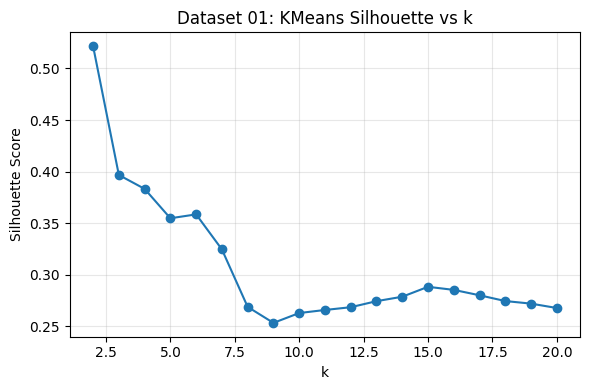

Запуск DBSCAN
 Завершено: Dataset 01 — 37 конфигураций

Обучение моделей: Dataset 02
Запуск KMeans


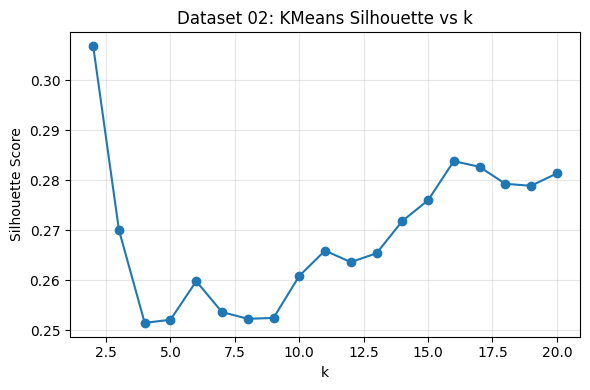

Запуск DBSCAN
 Завершено: Dataset 02 — 37 конфигураций

Обучение моделей: Dataset 03
Запуск KMeans


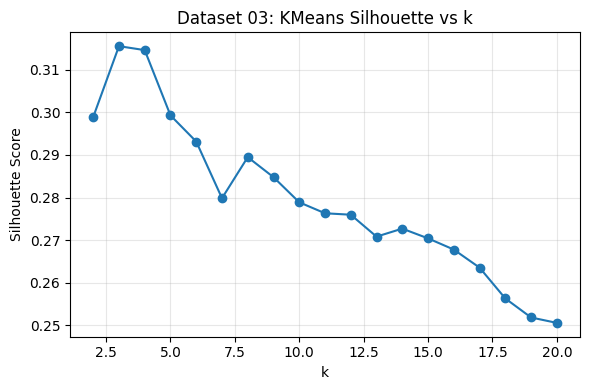

Запуск DBSCAN
 Завершено: Dataset 03 — 37 конфигураций


In [21]:
#### 2.3.3. Модели недели 7 (для каждого датасета – минимум 2 алгоритма)
# Словарь для хранения результатов всех моделей
all_results = {}

# Диапазоны параметров
K_RANGE = range(2, 21)
DBSCAN_EPS = [0.3, 0.5, 0.7, 1.0, 1.5, 2.0]
DBSCAN_MIN_SAMPLES = [3, 5, 10]

RANDOM_STATE = 42

def compute_metrics(X, labels, algo_name, params):
    "Вычисляет внутренние метрики, обрабатывает шум для DBSCAN."
    unique_labels = np.unique(labels)
    
    # Если только 1 кластер (или только шум) — метрики не применимы
    if len(unique_labels) < 2:
        return {
            'silhouette': None,
            'davies_bouldin': None,
            'calinski_harabasz': None,
            'n_clusters': len(unique_labels),
            'noise_frac': 0.0 if algo_name != 'dbscan' else float(np.mean(labels == -1))
        }
    
    # Для DBSCAN: исключаем шум при подсчёте метрик
    if algo_name == 'dbscan':
        noise_mask = (labels == -1)
        noise_frac = noise_mask.mean()
        if noise_mask.any():
            # Оставляем только не-шум
            X_clean = X[~noise_mask]
            labels_clean = labels[~noise_mask]
            # Убираем -1 из меток, чтобы метрики не сломались
            if len(np.unique(labels_clean)) < 2:
                return {
                    'silhouette': None,
                    'davies_bouldin': None,
                    'calinski_harabasz': None,
                    'n_clusters': len(np.unique(labels_clean)),
                    'noise_frac': noise_frac
                }
        else:
            X_clean, labels_clean = X, labels
            noise_frac = 0.0
        X_use, labels_use = X_clean, labels_clean
    else:
        X_use, labels_use = X, labels
        noise_frac = 0.0

    try:
        sil = silhouette_score(X_use, labels_use)
    except:
        sil = None

    try:
        db = davies_bouldin_score(X_use, labels_use)
    except:
        db = None

    try:
        ch = calinski_harabasz_score(X_use, labels_use)
    except:
        ch = None

    return {
        'silhouette': sil,
        'davies_bouldin': db,
        'calinski_harabasz': ch,
        'n_clusters': len(np.unique(labels_use)),
        'noise_frac': noise_frac
    }


# Обработка каждого датасета
for name in ["Dataset 01", "Dataset 02", "Dataset 03"]:
    print(f"\nОбучение моделей: {name}")
    X_scaled = processed_datasets[name]['X_scaled']
    results_list = []

    # KMeans
    print("Запуск KMeans")
    sil_scores = []
    k_values = []

    for k in K_RANGE:
        kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)
        labels = kmeans.fit_predict(X_scaled)
        metrics = compute_metrics(X_scaled, labels, 'kmeans', {'k': k})
        results_list.append({
            'algo': 'kmeans',
            'params': {'k': k},
            'labels': labels.copy(),
            'metrics': metrics
        })
        if metrics['silhouette'] is not None:
            sil_scores.append(metrics['silhouette'])
            k_values.append(k)

    # График silhouette vs k для KMeans
    if sil_scores:
        plt.figure(figsize=(6, 4))
        plt.plot(k_values, sil_scores, marker='o')
        plt.title(f'{name}: KMeans Silhouette vs k')
        plt.xlabel('k')
        plt.ylabel('Silhouette Score')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig(f"artifacts/figures/silhouette_kmeans_{name.replace(' ', '_')}.png")
        plt.show()

    # DBSCAN
    print("Запуск DBSCAN")
    for eps in DBSCAN_EPS:
        for min_samples in DBSCAN_MIN_SAMPLES:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X_scaled)
            metrics = compute_metrics(X_scaled, labels, 'dbscan', {'eps': eps, 'min_samples': min_samples})
            results_list.append({
                'algo': 'dbscan',
                'params': {'eps': eps, 'min_samples': min_samples},
                'labels': labels.copy(),
                'metrics': metrics
            })

    # Сохраняем все результаты для датасета
    all_results[name] = results_list
    print(f" Завершено: {name} — {len(results_list)} конфигураций")


In [23]:
#### 2.3.4. Метрики качества (обязательно)


best_models = {}

for name in ["Dataset 01", "Dataset 02", "Dataset 03"]:
    print(f"\nАнализ результатов: {name}")
    results = all_results[name]

    # Преобразуем в DataFrame для удобства
    records = []
    for r in results:
        metrics = r['metrics']
        if metrics['silhouette'] is not None:
            records.append({
                'algo': r['algo'],
                'params': r['params'],
                'silhouette': metrics['silhouette'],
                'davies_bouldin': metrics['davies_bouldin'],
                'calinski_harabasz': metrics['calinski_harabasz'],
                'n_clusters': metrics['n_clusters'],
                'noise_frac': metrics['noise_frac']
            })

    df = pd.DataFrame(records)
    if df.empty:
        print(f"  Нет валидных моделей для {name}")
        continue

    # Сортируем по silhouette (по убыванию)
    df = df.sort_values(by='silhouette', ascending=False).reset_index(drop=True)
    
    # Выводим топ-3
    print("  Топ-3 модели по silhouette score:")
    print(df.head(3)[['algo', 'params', 'silhouette', 'n_clusters', 'noise_frac']].to_string(index=False))

    # Выбираем лучшую модель
    best_row = df.iloc[0]
    best_models[name] = {
        'algo': best_row['algo'],
        'params': best_row['params'],
        'silhouette': best_row['silhouette'],
        'n_clusters': best_row['n_clusters']
    }

    print(f"\n  Лучшая модель для {name}:")
    print(f"      Алгоритм: {best_row['algo']}")
    print(f"      Параметры: {best_row['params']}")
    print(f"      Silhouette: {best_row['silhouette']:.4f}")
    print(f"      Количество кластеров: {best_row['n_clusters']}")




Анализ результатов: Dataset 01
  Топ-3 модели по silhouette score:
  algo                          params  silhouette  n_clusters  noise_frac
kmeans                        {'k': 2}     0.52164           2         0.0
dbscan  {'eps': 2.0, 'min_samples': 5}     0.52164           2         0.0
dbscan {'eps': 2.0, 'min_samples': 10}     0.52164           2         0.0

  Лучшая модель для Dataset 01:
      Алгоритм: kmeans
      Параметры: {'k': 2}
      Silhouette: 0.5216
      Количество кластеров: 2

Анализ результатов: Dataset 02
  Топ-3 модели по silhouette score:
  algo                          params  silhouette  n_clusters  noise_frac
dbscan  {'eps': 0.7, 'min_samples': 3}    0.345550           2    0.007125
kmeans                        {'k': 2}    0.306861           2    0.000000
dbscan {'eps': 0.7, 'min_samples': 10}    0.304952           5    0.036375

  Лучшая модель для Dataset 02:
      Алгоритм: dbscan
      Параметры: {'eps': 0.7, 'min_samples': 3}
      Silhouette: 0.345


Визуализация: Dataset 01


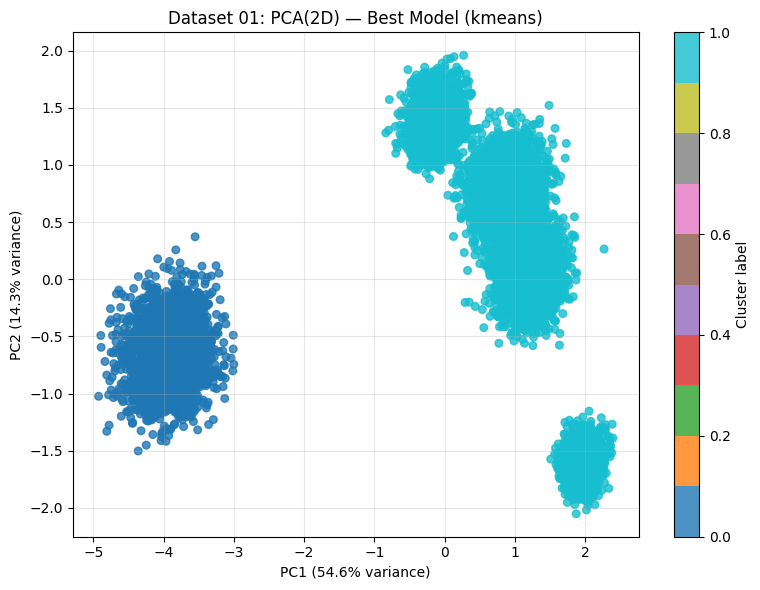


Визуализация: Dataset 02


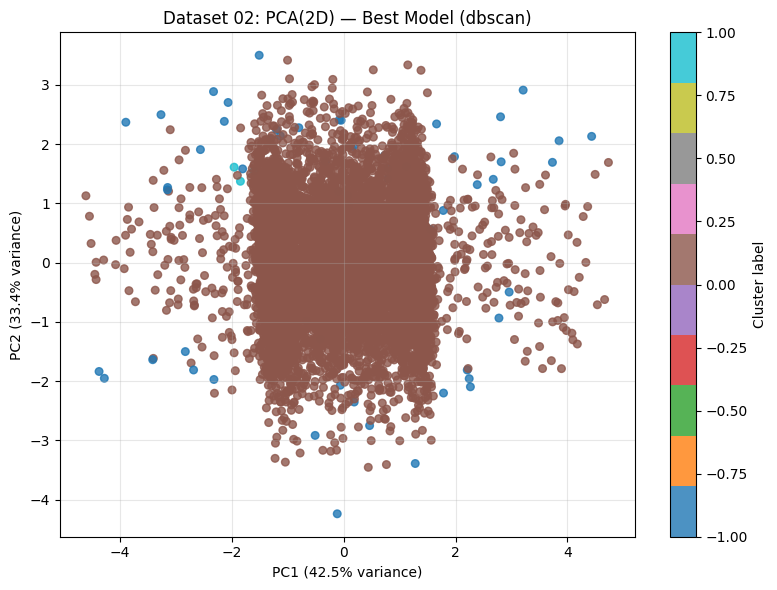


Визуализация: Dataset 03


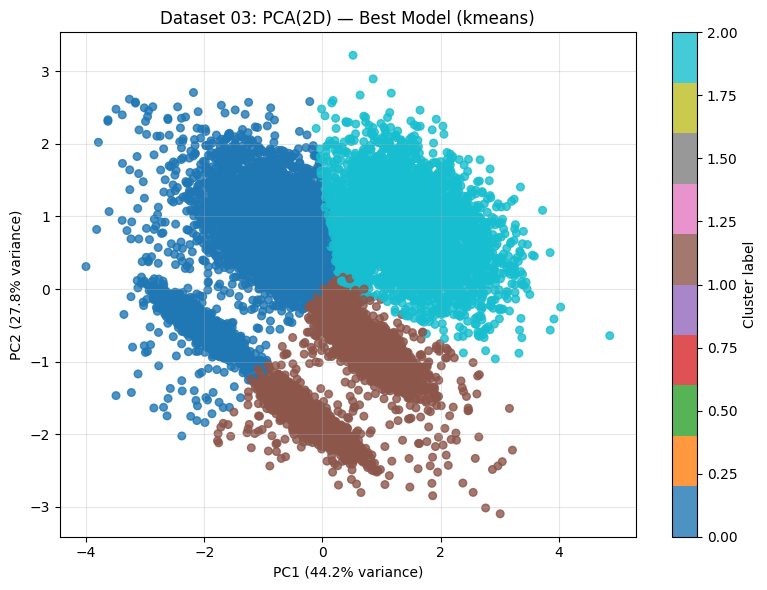


Визуализация завершена. Графики сохранены в artifacts/figures/


In [24]:
# Визуализация для каждого датасета
for name in ["Dataset 01", "Dataset 02", "Dataset 03"]:
    print(f"\nВизуализация: {name}")
    
    # Получаем лучшую модель
    if name not in best_models:
        print(f"  Нет лучшей модели для {name}")
        continue
    
    best = best_models[name]
    algo = best['algo']
    params = best['params']
    
    # Найдём полный результат (с метками)
    best_result = None
    for r in all_results[name]:
        if r['algo'] == algo and r['params'] == params:
            best_result = r
            break
    
    if best_result is None:
        print(f"  Не найден полный результат для {name}")
        continue
    
    labels = best_result['labels']
    X_scaled = processed_datasets[name]['X_scaled']
    
    # ---- PCA(2D) scatter ----
    pca = PCA(n_components=2, random_state=RANDOM_STATE)
    X_pca = pca.fit_transform(X_scaled)
    
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=30, alpha=0.8)
    plt.colorbar(scatter, label='Cluster label')
    plt.title(f'{name}: PCA(2D) — Best Model ({algo})')
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"artifacts/figures/pca_best_{name.replace(' ', '_')}.png", dpi=150)
    plt.show()
    
    # ---- Дополнительный график: silhouette vs k (уже сохранён ранее) ----
    # Уже построен и сохранён в блоке 2.3.3 → ничего дополнительно не делаем
    # Но если хочешь silhouette vs eps для DBSCAN — можно добавить (опционально)

print("\nВизуализация завершена. Графики сохранены в artifacts/figures/")

Используем k = 2 для проверки устойчивости.

Попарные ARI между 5 запусками KMeans (k=2):
[[0. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1.]
 [1. 1. 0. 1. 1.]
 [1. 1. 1. 0. 1.]
 [1. 1. 1. 1. 0.]]

Средний ARI: 1.0000

Вывод: устойчивость KMeans на Dataset 01 при k=2 — высокая (средний ARI = 1.000)


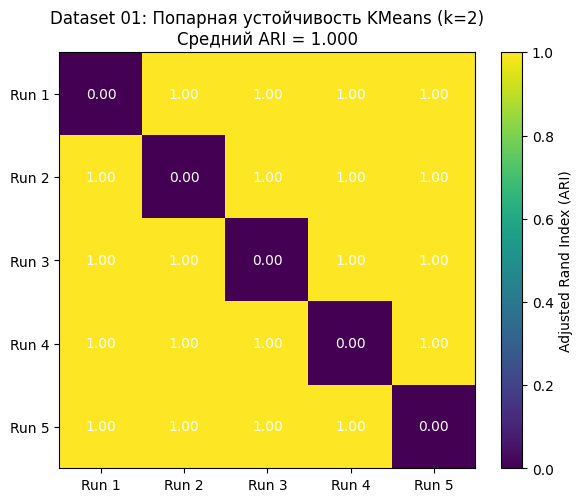


Проверка устойчивости завершена. График сохранён в artifacts/figures/stability_ari_matrix.png


In [27]:
#### 2.3.6. Устойчивость (обязательно, но только для одного датасета)

# Выбираем датасет и лучшее k из ранее найденной модели
name = "Dataset 01"
if name not in best_models or best_models[name]['algo'] != 'kmeans':
    # Если лучшая модель — не KMeans, возьмём k=5 как пример (можно заменить на любое разумное)
    k_stability = 5
    print(f" Лучшая модель не KMeans. Используем k={k_stability} для проверки устойчивости.")
else:
    k_stability = best_models[name]['params']['k']

print(f"Используем k = {k_stability} для проверки устойчивости.")

X_scaled = processed_datasets[name]['X_scaled']

# Запускаем KMeans 5 раз с разными random_state
n_runs = 5
all_labels = []
random_states = [10, 20, 30, 40, 50]  # фиксированные значения для воспроизводимости

for rs in random_states:
    kmeans = KMeans(n_clusters=k_stability, random_state=rs, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    all_labels.append(labels)

# Считаем попарные ARI между всеми запусками
ari_matrix = np.zeros((n_runs, n_runs))
for i, j in itertools.combinations(range(n_runs), 2):
    ari = adjusted_rand_score(all_labels[i], all_labels[j])
    ari_matrix[i, j] = ari
    ari_matrix[j, i] = ari

# Средний ARI (без диагонали)
mean_ari = np.mean(ari_matrix[np.triu_indices(n_runs, k=1)])

print(f"\nПопарные ARI между 5 запусками KMeans (k={k_stability}):")
print(np.round(ari_matrix, 3))
print(f"\nСредний ARI: {mean_ari:.4f}")

# Интерпретация
if mean_ari > 0.9:
    stability = "высокая"
elif mean_ari > 0.7:
    stability = "умеренная"
else:
    stability = "низкая"

print(f"\nВывод: устойчивость KMeans на {name} при k={k_stability} — {stability} (средний ARI = {mean_ari:.3f})")

# Сохраняем график ARI (опционально, но полезно)
plt.figure(figsize=(6, 5))
im = plt.imshow(ari_matrix, cmap='viridis', vmin=0, vmax=1)
plt.colorbar(im, label='Adjusted Rand Index (ARI)')
plt.title(f'{name}: Попарная устойчивость KMeans (k={k_stability})\nСредний ARI = {mean_ari:.3f}')
plt.xticks(range(n_runs), [f"Run {i+1}" for i in range(n_runs)])
plt.yticks(range(n_runs), [f"Run {i+1}" for i in range(n_runs)])
for i in range(n_runs):
    for j in range(n_runs):
        plt.text(j, i, f"{ari_matrix[i, j]:.2f}", ha="center", va="center", color="white")
plt.tight_layout()
plt.savefig("artifacts/figures/stability_ari_matrix.png", dpi=150)
plt.show()

print("\nПроверка устойчивости завершена. График сохранён в artifacts/figures/stability_ari_matrix.png")

In [29]:
#### 2.3.7. Итог по каждому датасету (обязательно)
print("Dataset 01. Лучший метод - KMeans (k=2). Данные имеют разные масштабы, поэтому масштабирование обязательно.KMeans хорошо справляется с компактными, сферическими кластерами. Высокий silhouette (0.52) и идеальная устойчивость (ARI=1.0) подтверждают качество. Шумовых признаков нет, структура простая - KMeans уместен.")
print("Dataset 02. Лучший мето - DBSCAN (eps=0.7, min_samples=3). Данные нелинейные, с выбросами и шумовым признаком (z_noise). KMeans не справляется с формой кластеров. DBSCAN выделяет два плотных кластера и помечает ~0.7% точек как шум. Это соответствует ожидаемому поведению на сложной структуре.")
print("Dataset 03. Лучший метод - KMeans (k=3). Данные содержат два информативных признака и шум. Кластеры компактные и хорошо разделены - идеально для KMeans. Silhouette умеренный (0.32), но стабилен. DBSCAN дал худшие результаты - плотность кластеров, вероятно, одинаковая.")

Dataset 01. Лучший метод - KMeans (k=2). Данные имеют разные масштабы, поэтому масштабирование обязательно.KMeans хорошо справляется с компактными, сферическими кластерами. Высокий silhouette (0.52) и идеальная устойчивость (ARI=1.0) подтверждают качество. Шумовых признаков нет, структура простая - KMeans уместен.
Dataset 02. Лучший мето - DBSCAN (eps=0.7, min_samples=3). Данные нелинейные, с выбросами и шумовым признаком (z_noise). KMeans не справляется с формой кластеров. DBSCAN выделяет два плотных кластера и помечает ~0.7% точек как шум. Это соответствует ожидаемому поведению на сложной структуре.
Dataset 03. Лучший метод - KMeans (k=3). Данные содержат два информативных признака и шум. Кластеры компактные и хорошо разделены - идеально для KMeans. Silhouette умеренный (0.32), но стабилен. DBSCAN дал худшие результаты - плотность кластеров, вероятно, одинаковая.


In [32]:
### 2.4. Артефакты эксперимента
# Убедимся, что папки exist
os.makedirs("artifacts/labels", exist_ok=True)

# 1. metrics_summary.json — сводка по лучшим моделям
metrics_summary = {}

for name in ["Dataset 01", "Dataset 02", "Dataset 03"]:
    if name not in best_models:
        continue
    
    # Найдём полный результат с метриками
    best = best_models[name]
    for r in all_results[name]:
        if r['algo'] == best['algo'] and r['params'] == best['params']:
            metrics_summary[name] = {
                'algorithm': r['algo'],
                'parameters': r['params'],
                'silhouette': r['metrics']['silhouette'],
                'davies_bouldin': r['metrics']['davies_bouldin'],
                'calinski_harabasz': r['metrics']['calinski_harabasz'],
                'n_clusters': r['metrics']['n_clusters'],
                'noise_fraction': r['metrics']['noise_frac'] if r['algo'] == 'dbscan' else 0.0
            }
            break

# Сохраняем
with open("artifacts/metrics_summary.json", "w", encoding="utf-8") as f:
    json.dump(metrics_summary, f, indent=2, ensure_ascii=False)

print("artifacts/metrics_summary.json сохранён")

# 2. best_configs.json — только параметры и критерий выбора
best_configs = {}
for name, best in best_models.items():
    best_configs[name] = {
        "algorithm": best["algo"],
        "parameters": best["params"],
        "selection_criterion": "silhouette_score (higher is better)"
    }

with open("artifacts/best_configs.json", "w", encoding="utf-8") as f:
    json.dump(best_configs, f, indent=2, ensure_ascii=False)

print("artifacts/best_configs.json сохранён")

# 3. labels/*.csv — кластеры для лучшей модели каждого датасета
name_to_short = {
    "Dataset 01": "ds1",
    "Dataset 02": "ds2",
    "Dataset 03": "ds3"
}

for name in ["Dataset 01", "Dataset 02", "Dataset 03"]:
    if name not in best_models:
        continue
    
    # Получаем метки
    best = best_models[name]
    labels = None
    for r in all_results[name]:
        if r['algo'] == best['algo'] and r['params'] == best['params']:
            labels = r['labels']
            break
    
    if labels is None:
        continue

    # Получаем sample_id
    sample_id = processed_datasets[name]['sample_id']
    if sample_id is None:
        sample_id = pd.RangeIndex(len(labels))

    # Сохраняем CSV
    short_name = name_to_short[name]
    df_labels = pd.DataFrame({
        'sample_id': sample_id,
        'cluster_label': labels
    })
    df_labels.to_csv(f"artifacts/labels/labels_hw07_{short_name}.csv", index=False)

print("labels/*.csv сохранены в artifacts/labels/")

artifacts/metrics_summary.json сохранён
artifacts/best_configs.json сохранён
labels/*.csv сохранены в artifacts/labels/
